# regresyon
- y' = a*x + b
- rmse/mse/mae/mape : |y-y'|

# logistic regression
- z = w*X + b -> weight1 * x1 + w2*x2... + bias (intercept)
- y' = sigmoid(z) -> 0-1 arası
- loss = y ile y' arasındaki fark. (..log...)

# MLP
- katmanlar tuple olarak tek parametre


# derin öğrenme kavramları
- ANN, CNN, RNN, LSTM
- katman / layer (network topology)
- forward/ backward propogation. ileri-geri yayılım
- loss(error), cost (epoch sonu, ortalama loss) hesaplama
- aktivasyon fonksiyonu (sigmoid, relu...)
---
- layer türleri: input-output, Dense, dropout, 3d-2d convolutional, pooling
- epoch (sklearn LogReg: maxiter=100)
- durma kriterleri
- batch size :32,64 -shuffle=True
- değişik loss fonksiyonları: categorical crossentropy
- learning rate: weightleri değiştirme miktarı  
- adam adaptive momentum

---
- GPU

# kaynak
- https://www.tensorflow.org/tutorials/quickstart/beginner
- https://www.tensorflow.org/tutorials/quickstart/advanced
- tuning: https://www.tensorflow.org/tutorials/keras/keras_tuner

In [ ]:
!pip install tensorflow --user

In [ ]:
!pip install utils

In [ ]:
!pip install keras

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from utils import *
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from keras.optimizers import Adam

In [2]:
yol = "/Users/bilal/Desktop/Google Drive/Colab Notebooks/data/house prices.csv"
data = pd.read_csv(yol)
data

,index,Date,Age,Distance,Stores,Lat,Lon,Price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157
...,...,...,...,...,...,...,...,...
4995,4995,2007,17,6,3,90,125,13539
4996,4996,2016,7,10,0,85,129,14757
4997,4997,2017,6,10,5,90,125,14102
4998,4998,2010,37,3,5,81,128,14313


In [3]:
data.drop(columns="index", inplace=True)
data

,Date,Age,Distance,Stores,Lat,Lon,Price
0,2009,21,9,6,84,121,14264
1,2007,4,2,3,86,121,12032
2,2016,18,3,7,90,120,13560
3,2002,13,2,2,80,128,12029
4,2014,25,5,8,81,122,14157
...,...,...,...,...,...,...,...
4995,2007,17,6,3,90,125,13539
4996,2016,7,10,0,85,129,14757
4997,2017,6,10,5,90,125,14102
4998,2010,37,3,5,81,128,14313


In [4]:
data.Price.describe()
Y_kat = pd.cut(data.Price, bins=[0,13900,17000], labels=[0, 1]) # MLPRegressor() -Y
data

,Date,Age,Distance,Stores,Lat,Lon,Price
0,2009,21,9,6,84,121,14264
1,2007,4,2,3,86,121,12032
2,2016,18,3,7,90,120,13560
3,2002,13,2,2,80,128,12029
4,2014,25,5,8,81,122,14157
...,...,...,...,...,...,...,...
4995,2007,17,6,3,90,125,13539
4996,2016,7,10,0,85,129,14757
4997,2017,6,10,5,90,125,14102
4998,2010,37,3,5,81,128,14313


In [5]:
"""
- eksik veri olmasın 
- normalize et (z-norm), sayısala çevir
- tahmin için ters dönüşüm fonksiyonu hazırla. reg: tah * gerçek.std() + gerçek.mean(). sınıflandırma:0-1 = az-çok
- aykırı değer var mı (önce - sonra)
- eğitim/test

- model oluştur
- eğitim-tahmin-başarı

- optimize et: aktivasyon fonk, loss (error) fonk, epoch, durma kriteri
"""

'\n- eksik veri olmasın \n- normalize et (z-norm), sayısala çevir\n- tahmin için ters dönüşüm fonksiyonu hazırla. reg: tah * gerçek.std() + gerçek.mean(). sınıflandırma:0-1 = az-çok\n- aykırı değer var mı (önce - sonra)\n- eğitim/test\n\n- model oluştur\n- eğitim-tahmin-başarı\n\n- optimize et: aktivasyon fonk, loss (error) fonk, epoch, durma kriteri\n'

In [7]:
data.isnull().sum()

Date        0
Age         0
Distance    0
Stores      0
Lat         0
Lon         0
Price       0
dtype: int64

# derin öğrenme - sınıflandırma

In [11]:
data_nr = (data - data.mean()) / data.std()
data_nr

,Date,Age,Distance,Stores,Lat,Lon,Price
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266
...,...,...,...,...,...,...,...
4995,-0.350485,-0.171675,0.319454,-0.609312,1.590328,0.001831,-0.360156
4996,1.298598,-1.054324,1.569518,-1.563848,0.009045,1.264460,0.833055
4997,1.481830,-1.142588,1.569518,0.027045,1.590328,0.001831,0.191385
4998,0.199209,1.593622,-0.618094,0.027045,-1.255981,0.948803,0.398091


In [15]:
(data_nr < -3).sum() 

Date        0
Age         0
Distance    0
Stores      0
Lat         0
Lon         0
Price       0
dtype: int64

In [16]:
Y = data_nr.Price
X = data_nr.drop(columns="Price")
X 

,Date,Age,Distance,Stores,Lat,Lon
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141
...,...,...,...,...,...,...
4995,-0.350485,-0.171675,0.319454,-0.609312,1.590328,0.001831
4996,1.298598,-1.054324,1.569518,-1.563848,0.009045,1.264460
4997,1.481830,-1.142588,1.569518,0.027045,1.590328,0.001831
4998,0.199209,1.593622,-0.618094,0.027045,-1.255981,0.948803


In [17]:
X = np.array(X).reshape(-1, 6)
X.shape

(5000, 6)

In [18]:
Y.shape

(5000,)

In [20]:
x_tr, x_test, y_tr, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# kategorik Y:0-1
x_tr, x_test, y_tr_kat, y_test_kat = train_test_split(X, Y_kat, test_size=0.2, random_state=2)

In [21]:
x_tr, y_tr

(array([[ 1.29859812, -1.14258845,  1.56951759, -0.60931203, -1.57223766,
          1.5801176 ],
        [ 1.66506107,  1.24056243,  1.56951759, -0.92749063,  0.64155798,
          0.00183081],
        [ 0.56567221,  0.88750304,  0.9444857 , -1.56384784, -1.25598114,
         -0.94514126],
        ...,
        [ 1.66506107,  0.4461788 ,  1.56951759, -1.24566924,  1.59032754,
          0.94880289],
        [-0.16725369, -1.40738299, -0.93060999, -1.24566924,  0.00904494,
          0.63314553],
        [-0.35048517,  0.71097334, -1.55564188, -0.92749063,  0.9578145 ,
          1.26446025]]), 868     0.066970
 936     1.912627
 4034    0.751744
 1923    0.301106
 3330    0.060113
           ...   
 3335   -0.065282
 1099   -1.481853
 2514    1.604038
 3606   -1.926613
 2575   -0.383668
 Name: Price, Length: 4000, dtype: float64)

In [22]:
y_tr_kat

868     1
936     1
4034    1
1923    1
3330    1
       ..
3335    0
1099    0
2514    1
3606    0
2575    0
Name: Price, Length: 4000, dtype: category
Categories (2, int64): [0 < 1]

In [33]:
network1 = (100,) 
network2 = (12, 15, 10)
network3 = (15, 20, 15, 8)

model = MLPClassifier(max_iter=200, hidden_layer_sizes=network3)
model
model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (15, 20, 15, 8),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [34]:
model.fit(x_tr, y_tr_kat)
model.score(x_test, y_test_kat)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.867

# derin öğrenme - regresyon

In [50]:
model = Sequential([
    Dense(10, input_shape = (6,), activation = 'relu'),
    Dense(20, activation = 'relu'),
    Dense(5, activation = 'relu'),
    Dense(1)
])

#opt = Adam(learning_rate=0.001)

model.compile(
    loss='mse', # mae, mape
    optimizer='adadelta'
)

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                70        
_________________________________________________________________
dense_9 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [52]:
early_stopping = EarlyStopping(monitor='val_loss', patience = 5)

In [53]:
sonuç = model.fit(
    x_tr, y_tr,
    validation_data = (x_test, y_test),
    epochs = 50,
    callbacks = [early_stopping]
)
sonuç

Epoch 1/50
125/125 [==============================] - 2s 14ms/step - loss: 223.5824 - val_loss: 232.6839
Epoch 2/50
125/125 [==============================] - 1s 8ms/step - loss: 223.1880 - val_loss: 232.2685
Epoch 3/50
125/125 [==============================] - 1s 9ms/step - loss: 222.8782 - val_loss: 231.9140
Epoch 4/50
125/125 [==============================] - 1s 10ms/step - loss: 222.5821 - val_loss: 231.5428
Epoch 5/50
125/125 [==============================] - 1s 8ms/step - loss: 222.2708 - val_loss: 231.1807
Epoch 6/50
125/125 [==============================] - 1s 8ms/step - loss: 221.9642 - val_loss: 230.7871
Epoch 7/50
125/125 [==============================] - 2s 16ms/step - loss: 221.6293 - val_loss: 230.3939
Epoch 8/50
125/125 [==============================] - 1s 11ms/step - loss: 221.3169 - val_loss: 230.0117
Epoch 9/50
125/125 [==============================] - 2s 12ms/step - loss: 220.9962 - val_loss: 229.6356
Epoch 10/50
125/125 [==============================] - 1s 1

In [54]:
sonuç.history

{'loss': [223.5824432373047,
  223.18798828125,
  222.878173828125,
  222.5821075439453,
  222.27084350585938,
  221.96421813964844,
  221.62925720214844,
  221.3169403076172,
  220.9962158203125,
  220.71234130859375,
  220.3991241455078,
  220.09742736816406,
  219.80343627929688,
  219.49325561523438,
  219.2163543701172,
  218.92105102539062,
  218.62319946289062,
  218.3395538330078,
  218.0491180419922,
  217.74017333984375,
  217.4428253173828,
  217.1504669189453,
  216.8674774169922,
  216.5900421142578,
  216.32501220703125,
  216.0370330810547,
  215.7524871826172,
  215.47352600097656,
  215.20606994628906,
  214.92501831054688,
  214.62928771972656,
  214.3463897705078,
  214.0886688232422,
  213.81484985351562,
  213.53271484375,
  213.2381591796875,
  212.96139526367188,
  212.68016052246094,
  212.40496826171875,
  212.129638671875,
  211.84884643554688,
  211.5748291015625,
  211.3047332763672,
  211.03948974609375,
  210.7571258544922,
  210.4886932373047,
  210.20347

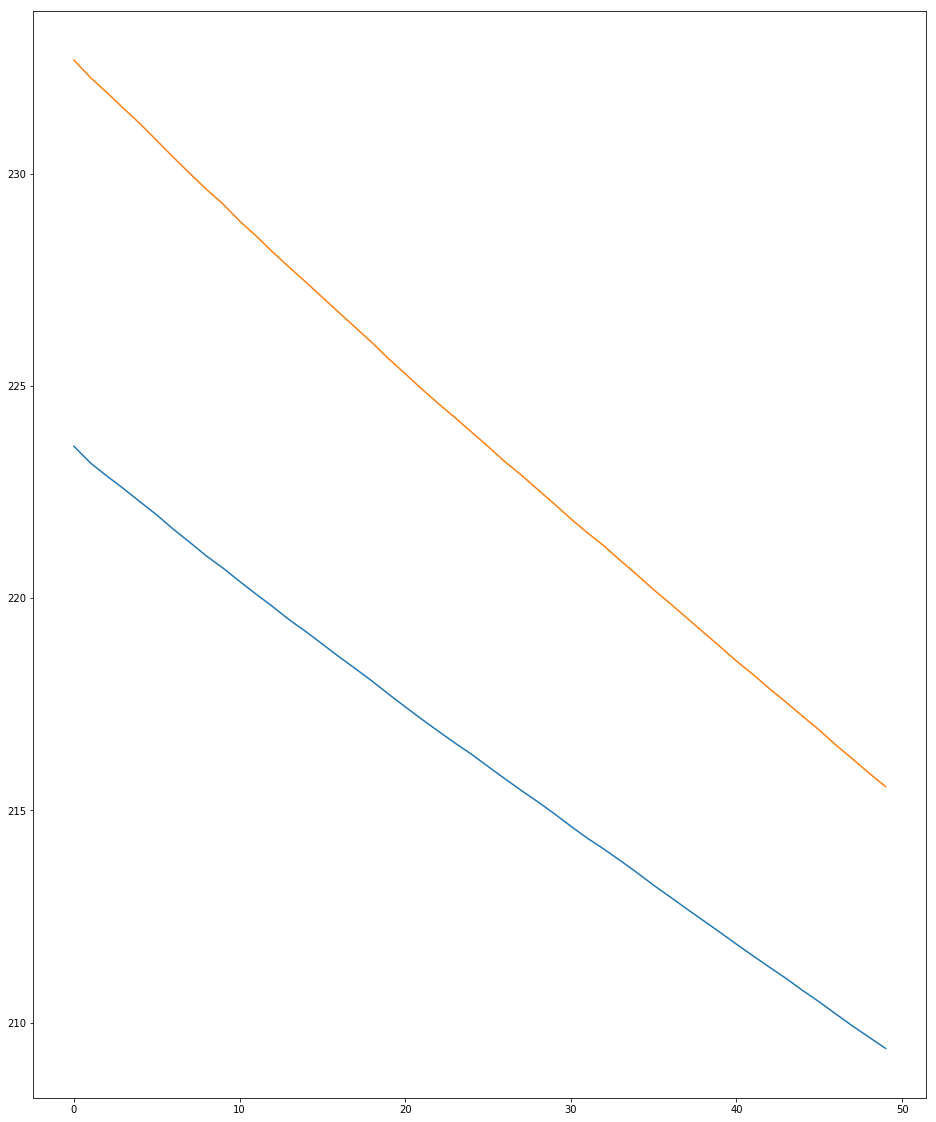

In [55]:
plt.figure(figsize=(16, 20))
plt.plot(sonuç.history["loss"])
plt.plot(sonuç.history["val_loss"])

In [56]:
tah = model.predict(x_test)
tah

array([[ 1.56221986e-01],
       [ 2.77730703e-01],
       [ 3.33582908e-01],
       [ 4.33096200e-01],
       [ 7.45041370e-02],
       [ 1.18127260e-02],
       [ 3.37425852e-03],
       [ 1.28108546e-01],
       [-2.46278476e-03],
       [-5.30988723e-02],
       [ 3.30198437e-01],
       [ 1.06465071e-01],
       [ 1.94383040e-01],
       [ 8.81038606e-02],
       [ 6.95936918e-01],
       [-4.24577259e-02],
       [ 4.71408397e-01],
       [-2.46278476e-03],
       [ 2.70886272e-02],
       [ 1.74612090e-01],
       [ 5.89514673e-01],
       [ 2.27742761e-01],
       [ 6.14019215e-01],
       [ 1.31897569e-01],
       [ 8.38303640e-02],
       [ 2.54039079e-01],
       [ 4.11402900e-04],
       [ 3.51294369e-01],
       [ 1.82967693e-01],
       [ 1.67766228e-01],
       [ 2.92459697e-01],
       [ 2.20911309e-01],
       [ 2.33889073e-01],
       [ 5.32195747e-01],
       [ 8.84471893e-01],
       [ 4.86654520e-01],
       [ 1.18861832e-01],
       [ 2.17990682e-01],
       [-5.2

In [48]:
tah.reshape(-1) * data.Price.std() + data.Price.mean()

array([15261.193 , 14006.283 , 14376.68  , 14452.592 , 13975.51  ,
       14104.618 , 13816.585 , 15247.969 , 14346.3125, 14385.707 ,
       14203.651 , 14738.392 , 14935.032 , 14366.463 , 14197.159 ,
       14631.925 , 13832.245 , 13889.252 , 14570.967 , 13843.062 ,
       13931.158 , 14098.979 , 13841.113 , 14599.188 , 14331.665 ,
       13816.585 , 15351.904 , 13885.028 , 14014.574 , 13816.585 ,
       14101.694 , 14320.817 , 14142.099 , 13818.134 , 14142.584 ,
       13861.321 , 13816.585 , 13816.585 , 14795.726 , 13997.715 ,
       14014.435 , 14247.867 , 13843.653 , 13919.669 , 13816.585 ,
       14151.02  , 13865.002 , 14237.396 , 13845.647 , 14021.516 ,
       14423.974 , 14261.528 , 14800.876 , 15441.697 , 13930.742 ,
       13816.585 , 14397.429 , 13923.545 , 14440.862 , 13816.585 ,
       13833.013 , 13816.585 , 13854.345 , 14338.06  , 13841.037 ,
       14802.003 , 13860.155 , 13999.247 , 14611.742 , 13899.526 ,
       14582.283 , 14142.451 , 15108.057 , 13848.969 , 13816.5

# derin öğrenme - sınıflandırma

In [59]:
?tf.keras.Sequential

In [113]:
from keras.optimizers import SGD, Adam
model = tf.keras.Sequential([
  Dense(12, input_shape=(6,), activation='sigmoid'),
  Dense(15, activation='relu'),
  Dense(10, activation='relu'),
  Dense(5, activation='relu'),
  #Dropout(.1),
  Dense(1)
])

optimizer = Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"
)

In [114]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [115]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 12)                84        
_________________________________________________________________
dense_54 (Dense)             (None, 15)                195       
_________________________________________________________________
dense_55 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_56 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 6         
Total params: 500
Trainable params: 500
Non-trainable params: 0
_________________________________________________________________


In [116]:
model.fit(x_tr, y_tr_kat,
          validation_data=(x_test, y_test_kat), 
          #validation_split=0.2,
          batch_size=32,
          epochs=20)

Epoch 1/20
125/125 [==============================] - 1s 11ms/step - loss: nan - accuracy: 0.5080 - val_loss: nan - val_accuracy: 0.4830
Epoch 2/20
125/125 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.5080 - val_loss: nan - val_accuracy: 0.4830
Epoch 3/20
125/125 [==============================] - 1s 9ms/step - loss: nan - accuracy: 0.5080 - val_loss: nan - val_accuracy: 0.4830
Epoch 4/20
125/125 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.5080 - val_loss: nan - val_accuracy: 0.4830
Epoch 5/20
125/125 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.5080 - val_loss: nan - val_accuracy: 0.4830
Epoch 6/20
125/125 [==============================] - 2s 13ms/step - loss: nan - accuracy: 0.5080 - val_loss: nan - val_accuracy: 0.4830
Epoch 7/20
125/125 [==============================] - 2s 13ms/step - loss: nan - accuracy: 0.5080 - val_loss: nan - val_accuracy: 0.4830
Epoch 8/20
125/125 [========================

In [97]:
# multi output çok sınıflı: https://scikit-learn.org/stable/modules/multiclass.html

In [98]:
#model.history.history["loss"]

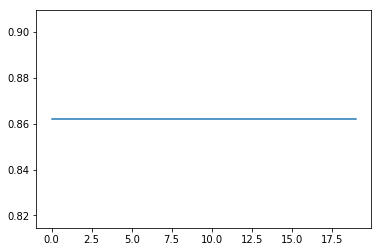

In [99]:
plt.plot(model.history.history["val_accuracy"])

In [117]:
# https://www.kaggle.com/alihantabak/rnn-workout-on-international-airline-passenger